# Определение возраста покупателей / Determining the age of buyers

Сетевой супермаркет внедряет систему компьютерного зрения для обработки фотографий покупателей. Фотофиксация в прикассовой зоне поможет определять возраст клиентов, чтобы:

- Анализировать покупки и предлагать товары, которые могут заинтересовать покупателей этой возрастной группы;

- Контролировать добросовестность кассиров при продаже алкоголя.

Требуется построить модель, которая по фотографии определит приблизительный возраст человека.

Данные: набор фотографий людей с указанием возраста.

A chain supermarket is implementing a computer vision system to process customer photos. Photo recording in the checkout area will help determine the age of customers in order to:

- Analyze purchases and offer products that may be of interest to buyers of this age group;

- Monitor the integrity of cashiers when selling alcohol.

It is required to build a model that will determine the approximate age of a person from a photograph.

Data: a set of photographs of people indicating their age.

## Исследовательский анализ данных / Exploratory data analysis

Импортируем необходимые библиотеки: / Import the necessary libraries:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Выведем размер выборки: / Let's get the sample size:

In [2]:
labels = pd.read_csv('/datasets/faces/labels.csv')
print(labels.shape)

(7591, 2)


Распределение возраста: / Age distribution:

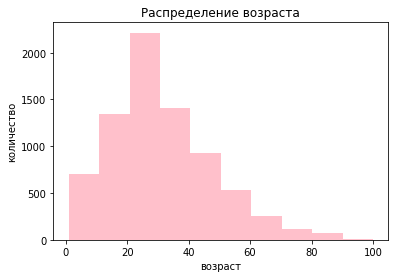

In [3]:
plt.hist(labels["real_age"], color = 'pink')
plt.title('Распределение возраста')
plt.xlabel('возраст')
plt.ylabel('количество')
plt.show()

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255)
train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=labels,
        directory='/datasets/faces/final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        seed=12345)

Found 7591 validated image filenames.


Вывод фотографий: / Photo output:

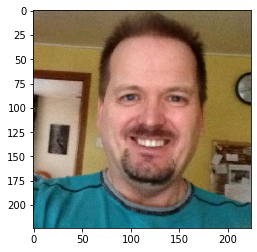

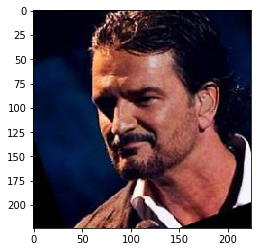

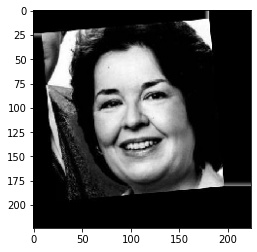

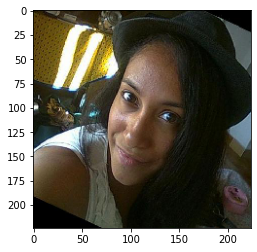

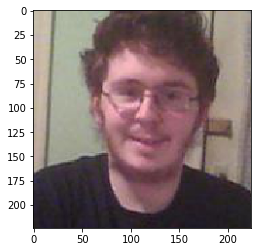

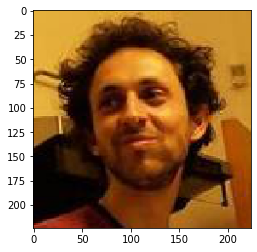

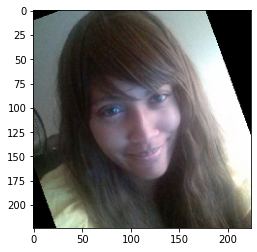

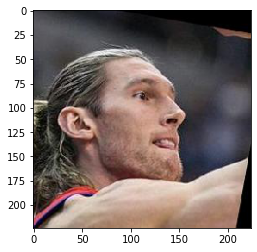

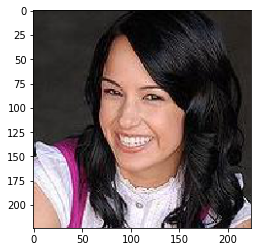

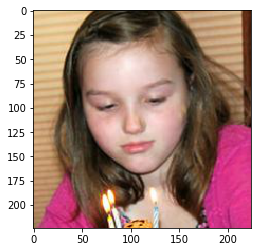

In [5]:
for _ in range(10):
    img, label = train_gen_flow.next()
    plt.imshow(img[0])
    plt.show()

В датасете представлены фотографии лиц людей различных возрастов. Всего в выборке 7591 фотография. Большая часть фотографий людей возрастом 20-40 лет.

Фотографии являются растровыми изображениями.

У фотографий разные яркость, контраст и гамма.

The dataset contains photographs of faces of people of different ages. There are 7591 photographs in the sample. Most of the photographs are of people aged 20-40 years.

Photos are raster images.

Photos have different brightness, contrast and gamma

## Обучение модели / Model training

```python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, AvgPool2D, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50


def load_train(path):
    train_datagen = ImageDataGenerator(validation_split=0.25, rescale=1/255.,
                                       width_shift_range = 0.2 ,
                                       height_shift_range =0.2 
                                       )
    labels = pd.read_csv(f'{path}labels.csv')
    train_datagen_flow = train_datagen.flow_from_dataframe(dataframe=labels,
        directory=f'{path}/final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        subset='training',
        seed=12345)
    return train_datagen_flow 

def load_test(path):
    labels = pd.read_csv(f'{path}labels.csv')
    test_datagen = ImageDataGenerator(validation_split=0.25, rescale=1/255.)
    test_datagen_flow = test_datagen.flow_from_dataframe(
        dataframe=labels,
        directory= f'{path}/final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        subset='training',
        seed=12345)
    return test_datagen_flow


def create_model(input_shape):
    optimizer = Adam(learning_rate=0.0001)
    backbone = ResNet50(input_shape=input_shape,
                    weights='imagenet', 
                    include_top=False)
    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(1, activation='relu')) 
    model.compile(optimizer=optimizer, loss='mse',  metrics=['mae']) 
    return model

def train_model(model, train_data, test_data, batch_size=None, epochs=10,
               steps_per_epoch=None, validation_steps=None):
    model.fit(train_data, 
              validation_data=test_data,
              batch_size=batch_size, epochs=epochs,
              steps_per_epoch=steps_per_epoch,
              validation_steps=validation_steps,
              verbose=2, shuffle=True)

    return model
```

```python
178/178 - 122s - loss: 241.7409 - mae: 11.1409 - val_loss: 764.2930 - val_mae: 22.5709
Epoch 2/10
178/178 - 122s - loss: 86.9082 - mae: 7.0468 - val_loss: 968.9831 - val_mae: 26.2542
Epoch 3/10
178/178 - 109s - loss: 58.8910 - mae: 5.8281 - val_loss: 812.5680 - val_mae: 23.8027
Epoch 4/10
178/178 - 111s - loss: 44.9967 - mae: 5.1539 - val_loss: 147.8951 - val_mae: 8.4802
Epoch 5/10
178/178 - 113s - loss: 36.9620 - mae: 4.6725 - val_loss: 55.8239 - val_mae: 5.6303
Epoch 6/10
178/178 - 111s - loss: 29.9818 - mae: 4.2711 - val_loss: 26.8859 - val_mae: 4.0001
Epoch 7/10
178/178 - 112s - loss: 25.1039 - mae: 3.8795 - val_loss: 49.1461 - val_mae: 5.7132
Epoch 8/10
178/178 - 118s - loss: 22.5796 - mae: 3.7148 - val_loss: 20.8854 - val_mae: 3.4839
Epoch 9/10
178/178 - 120s - loss: 20.3622 - mae: 3.4740 - val_loss: 55.9538 - val_mae: 5.9425
Epoch 10/10
178/178 - 120s - loss: 18.4098 - mae: 3.2865 - val_loss: 25.0116 - val_mae: 3.7848
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
178/178 - 31s - loss: 25.0116 - mae: 3.7848
Test MAE: 3.7848
```

## Анализ обученной модели / Analysis of the trained model

Значение MAE обученной модели = 3.7848.

Ошибка составила 4% от фактических значений.

MAE value of the trained model = 3.7848.

The error was 4% of the actual values.

Вывод: был проанализирован датасет фотографий людей, распределение возрастов в датасете; была построена модель, которая по фотографии определит приблизительный возраст человека.

Conclusion: a dataset of photographs of people was analyzed, the distribution of ages in the dataset; a model was built that would determine the approximate age of a person from a photograph.